In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [10]:
#uploaded the data set
data=pd.read_csv('census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
data.shape

(32560, 15)

In [12]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [13]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [15]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# find the numbers of question marks in the data

In [16]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [17]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [18]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [19]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [21]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [22]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [23]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

there are 3 cloumn having '?'-workclass,occupation,nativecountry

now replacing the same from mode of the given column

In [24]:
a1=data['Workclass'].mode()
a1

0     Private
dtype: object

In [25]:
data['Workclass']=data['Workclass'].replace('?','private')

In [26]:
a2=data['Occupation'].mode()
a2

0     Prof-specialty
dtype: object

In [27]:
data['Occupation']=data['Occupation'].replace('?','Prof-specialty')

In [28]:
a3=data['Native_country'].mode()
a3

0     United-States
dtype: object

In [29]:
data['Native_country']=data['Native_country'].replace('?','United-States')

# ENCODING TECHNIQUE LABEL ENCODER 

LABEL ENCODER is used for all column as in other encoding technique no, of column will increase

In [30]:
from sklearn.preprocessing import LabelEncoder 

In [31]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Workclass'])
pd.Series(df)

0        6
1        4
2        4
3        4
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    5
Length: 32560, dtype: int32

In [32]:
data['Workclass']=df

In [33]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Education'])
data['Education']=df

In [34]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,4,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,4,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,4,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,4,284582,12,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [35]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Marital_status'])
data['Marital_status']=df

In [36]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Occupation'])
data['Occupation']=df

In [37]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Relationship'])
data['Relationship']=df

In [38]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Race'])
data['Race']=df

In [39]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Sex'])
data['Sex']=df

In [40]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Native_country'])
data['Native_country']=df

In [41]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Income'])
data['Income']=df

In [42]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


# DATA VISUALISATION EDA

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

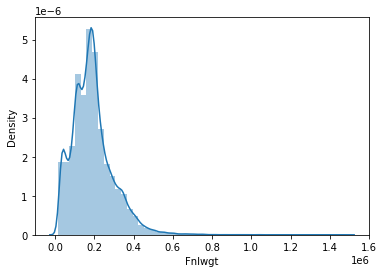

In [43]:

sns.distplot(data['Fnlwgt'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

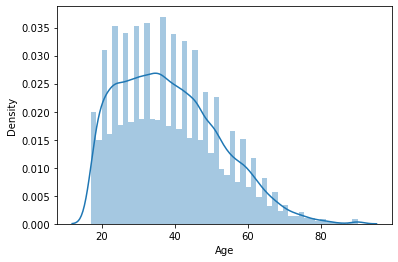

In [44]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

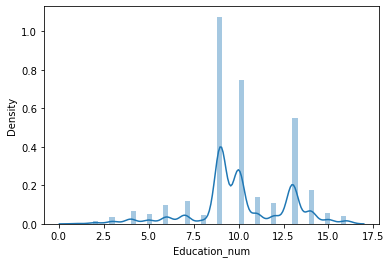

In [45]:
sns.distplot(data['Education_num'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

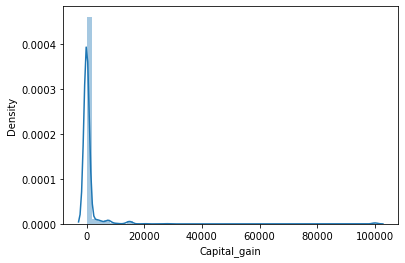

In [46]:
sns.distplot(data['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

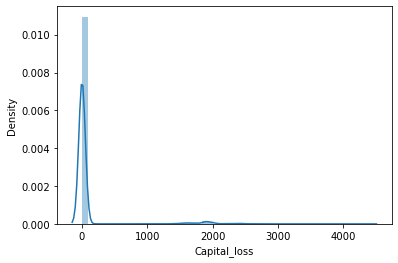

In [47]:
sns.distplot(data['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

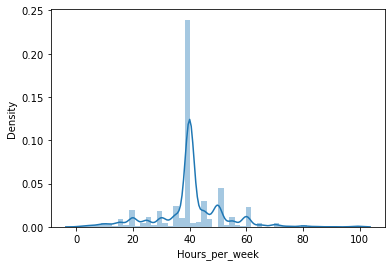

In [48]:
sns.distplot(data['Hours_per_week'])

In [49]:
X=data.drop(columns=['Income'])
y=data['Income']

In [50]:
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39


In [51]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

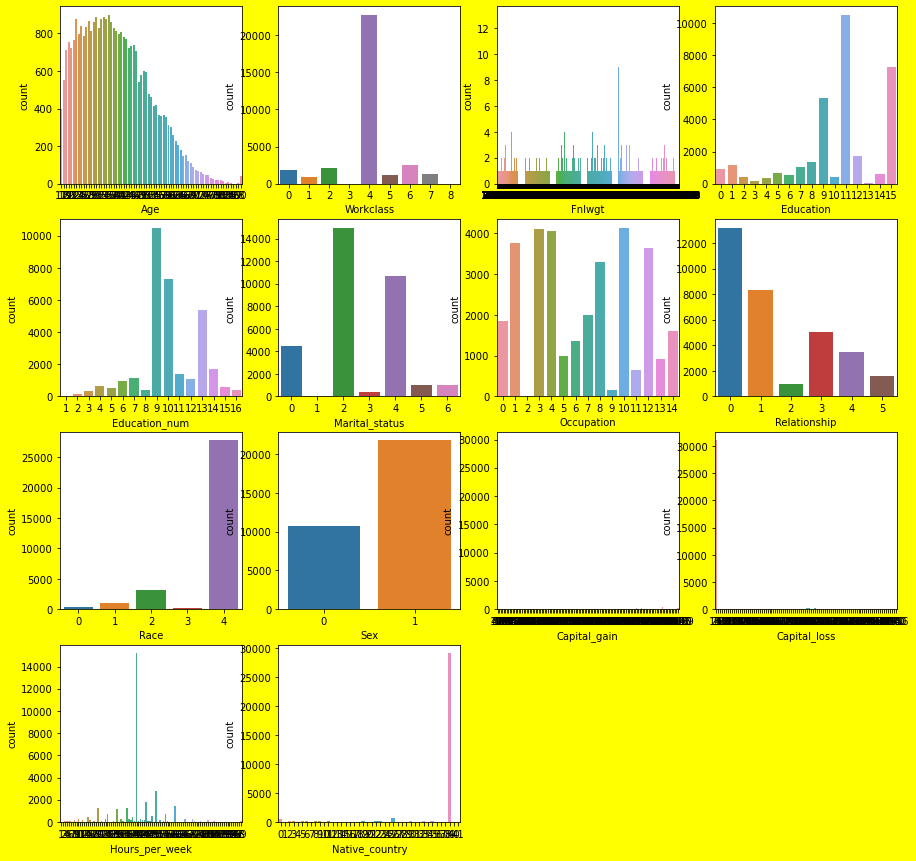

In [52]:
plt.figure(figsize=(15,15),facecolor='yellow')
plotnumber=1
for column in X:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.countplot(X[column])
    plotnumber+=1
plt.show()

In [53]:
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


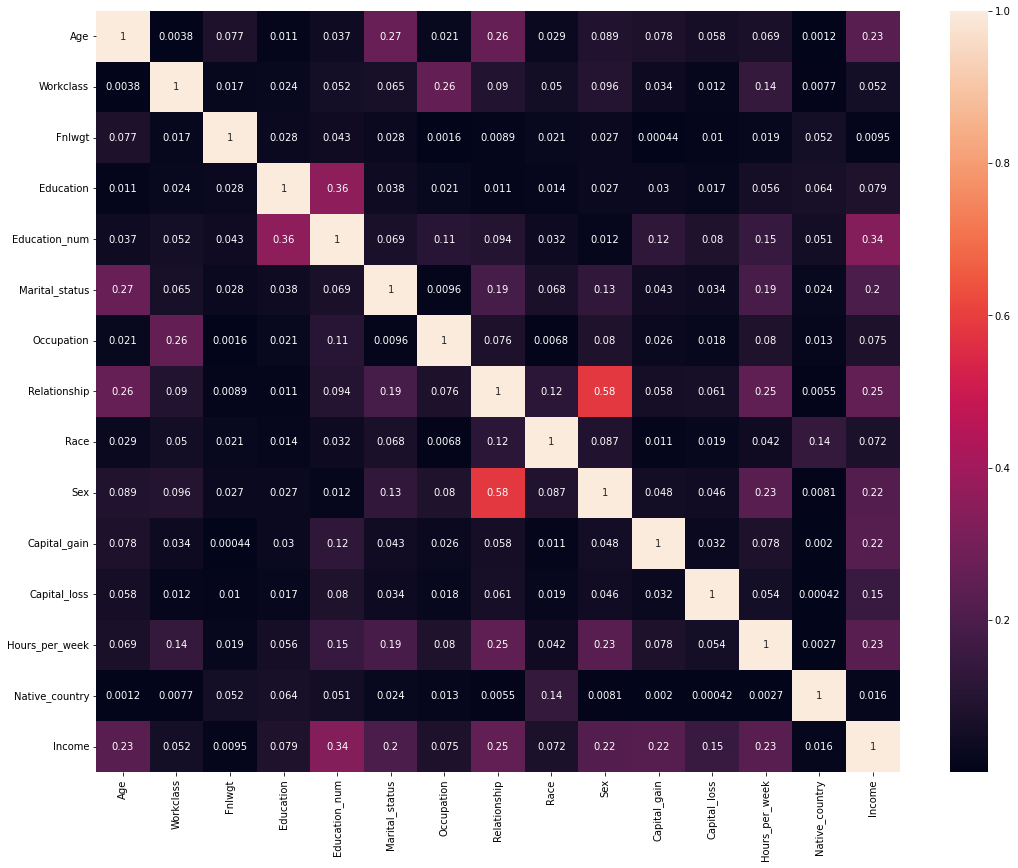

In [54]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

from heat map it can be observed that there is relation between sex and relationship but it is not so strong

there is no such corelation between target variable and features variable

In [55]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Most of column are categorical so there is no such skewness in the data,skewness is only present in Capital_gain and Capital_loss but both features have very less count and both can not be droped because they are directly effecting directly to income

In [56]:
#standard scaler has been applied 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=80)
y_train.head()

7227     0
24680    0
15052    0
2432     1
10969    0
Name: Income, dtype: int32

In [58]:
#applying logistic regression because label have categorical data and their is only two category in label either yes or no
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred=log_reg.predict(x_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [62]:
#finding accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7837837837837838

In [63]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[4645,  256],
       [1152,  459]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

In [65]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4901
           1       0.64      0.28      0.39      1611

    accuracy                           0.78      6512
   macro avg       0.72      0.62      0.63      6512
weighted avg       0.76      0.78      0.75      6512



# decision tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
clf.score(x_train,y_train)

1.0

In [69]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8121928746928747

# KNN CLASSIFIER

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier()

In [72]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred=knn.predict(x_test)

In [74]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[4493,  408],
       [1098,  513]], dtype=int64)

In [75]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4901
           1       0.56      0.32      0.41      1611

    accuracy                           0.77      6512
   macro avg       0.68      0.62      0.63      6512
weighted avg       0.74      0.77      0.74      6512



# Hyperparameter Tuning in Decision Trees

In [76]:
dt = DecisionTreeClassifier(random_state=32)

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4, 6,9,13],
    'min_samples_leaf': [2, 3, 4, 5,],
    'criterion': ["gini", "entropy"]
}

In [79]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, scoring = "accuracy")

In [80]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=32), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 9, 13],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='accuracy')

In [81]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=32)

In [82]:
gd=grid_search.best_estimator_

In [83]:
clf=DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=32)

In [84]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=32)

In [85]:
clf.score(x_train,y_train)

0.8520039926289926

In [86]:
y_pred=clf.predict(x_test)

In [87]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[4663,  238],
       [ 769,  842]], dtype=int64)

In [88]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4901
           1       0.78      0.52      0.63      1611

    accuracy                           0.85      6512
   macro avg       0.82      0.74      0.76      6512
weighted avg       0.84      0.85      0.83      6512



After tuning the model accuracy has been increased,so finally Decision Tree Algorithm is best for this data set

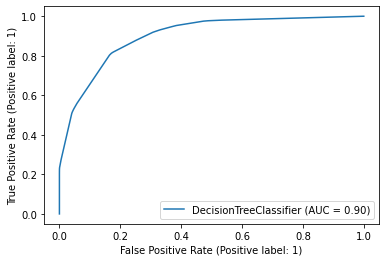

In [90]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(clf,x_train,y_train)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

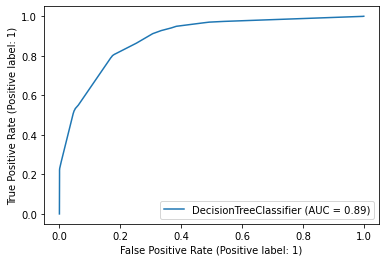

In [91]:
disp=plot_roc_curve(clf,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

saving the model using pickle

In [139]:
import pickle

In [140]:
filename='final_census_income'
pickle.dump(clf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))
